In [224]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Import data and drop useless features:

In [225]:
df_merged= pd.read_csv('df_merged.csv')

df = df_merged.drop(['Customer ID', 
                             'Count', 
                             'Under 30', 
                             'Dependents',
                             'Quarter', 
                             'Referred a Friend', 
                             'Internet Service',
                             'Customer Status', 
                             'Churn Label',
                             'Churn Score', 
                             'Churn Category',
                             'Churn Reason', 
                             'Country', 
                             'State',
                             'City',
                             'Lat Long',
                             'Latitude',
                             'Longitude'
                            ], axis=1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [227]:
df.isna().sum()

Gender                                  0
Age                                     0
Senior Citizen                          0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

### Perform initial preprocessing by encoding binary features and one-hot encoding categorical features:

In [228]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_binary_features(df, binary_features):
    le = LabelEncoder()
    for feature in binary_features:
        df[feature] = le.fit_transform(df[feature])
    return df

def encode_multi_class_features(df, multi_class_features):
    onehotencoder = OneHotEncoder(drop='first', sparse_output=False)
    df_encoded = pd.DataFrame(onehotencoder.fit_transform(df[multi_class_features]))
    
    # Retrieve the column names after OneHotEncoding
    df_encoded.columns = onehotencoder.get_feature_names_out(multi_class_features)
    
    # Convert one-hot encoded columns to int64
    df_encoded = df_encoded.astype('int64')
    
    # Concatenate the original df with the one-hot encoded df
    df = pd.concat([df, df_encoded], axis=1)
    
    # Drop the original multi-class categorical columns
    df.drop(columns=multi_class_features, inplace=True)
    
    return df

def convert_numeric_columns(df, numeric_columns):
    for column in numeric_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


# Define feature lists
binary_features = [
    'Gender', 'Senior Citizen', 'Married', 'Phone Service', 'Multiple Lines', 
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]

multi_class_features = [
    'Offer', 'Internet Type', 'Contract', 'Payment Method'
]

numeric_columns = [
    'Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 
    'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 
    'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 
    'Total Revenue', 'Satisfaction Score', 'CLTV'
]

# Encode features
df = encode_binary_features(df, binary_features)
df = encode_multi_class_features(df, multi_class_features)

# Ensure numeric columns are indeed numeric
df = convert_numeric_columns(df, numeric_columns)


In [229]:
df.head()

,Gender,Age,Senior Citizen,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Offer_Offer D,Offer_Offer E,Offer_nan,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_nan,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,78,1,0,0,0,1,0,0.00,0,...,0,0,1,1,0,0,0,0,0,0
1,0,74,1,1,1,1,8,1,48.85,1,...,0,1,0,0,1,0,0,0,1,0
2,1,71,1,0,3,0,18,1,11.33,1,...,1,0,0,0,1,0,0,0,0,0
3,0,78,1,1,1,1,25,1,19.76,0,...,0,0,0,0,1,0,0,0,0,0
4,0,80,1,1,1,1,37,1,6.33,1,...,0,0,0,0,1,0,0,0,0,0


In [230]:
df.isna().sum()

Gender                               0
Age                                  0
Senior Citizen                       0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Paperless Billing                    0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue            

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int32  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int32  
 3   Married                            7043 non-null   int32  
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   int32  
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   int32  
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   int32

### Inspect data by plotting (histograms and correlation matrix):

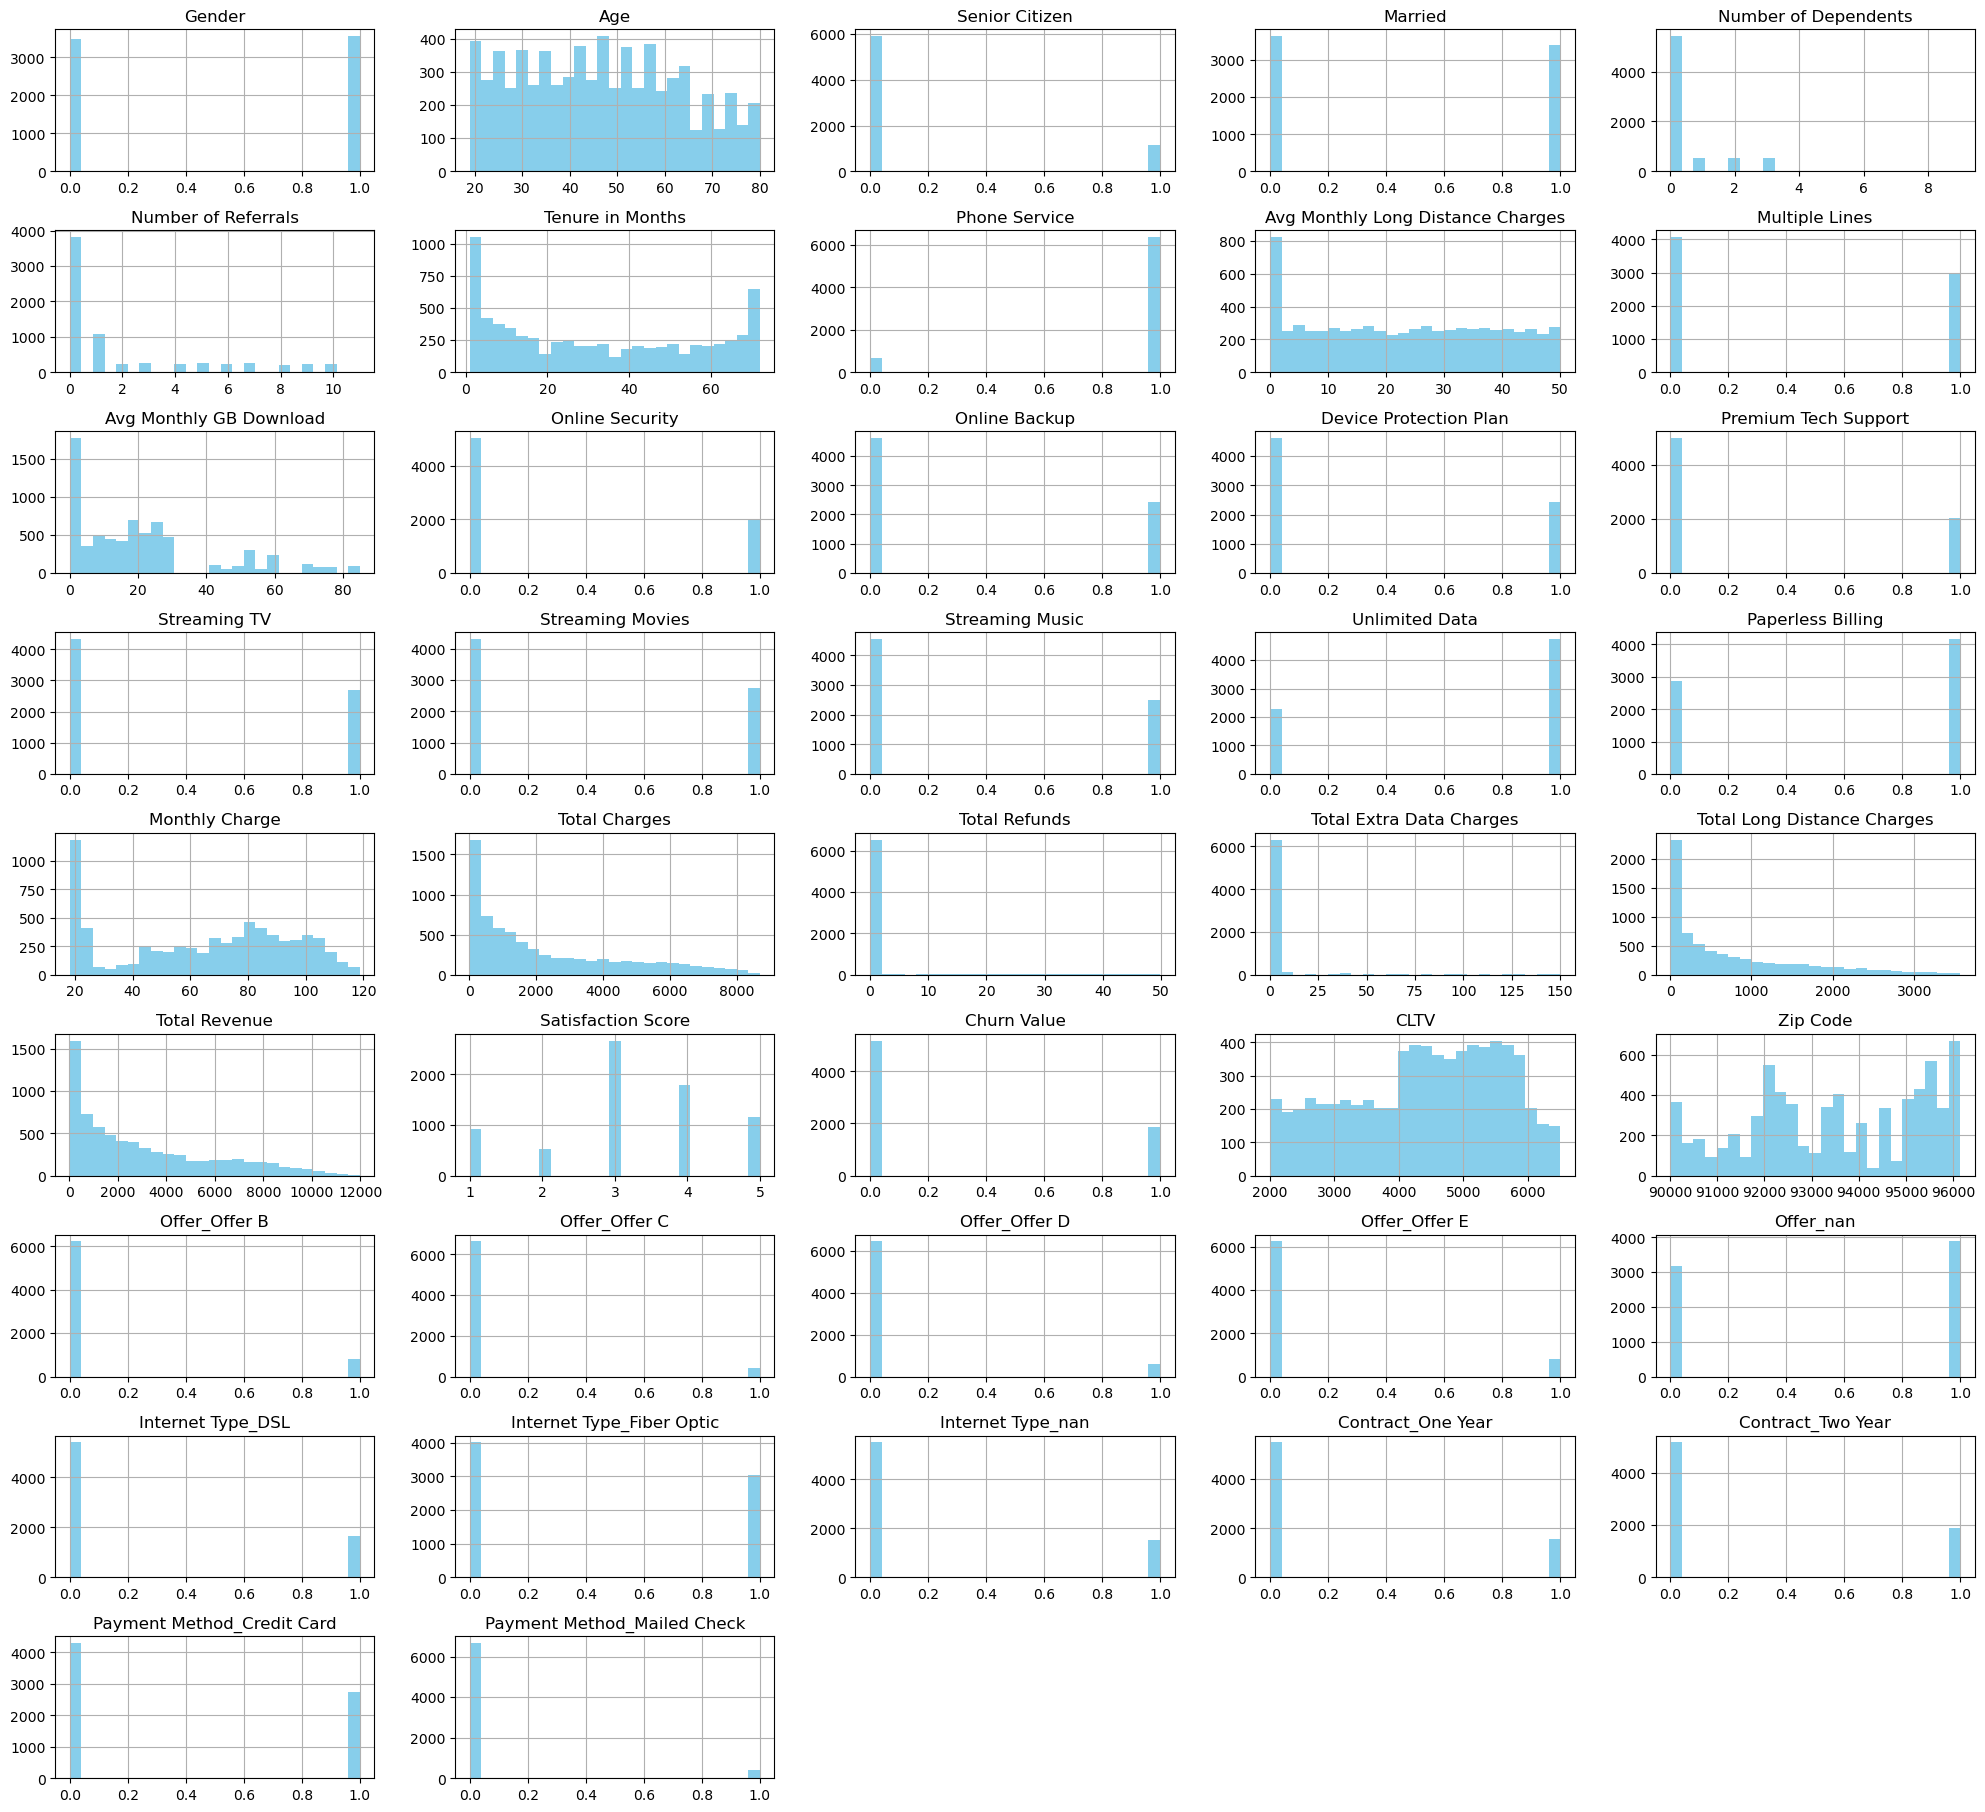

In [231]:
df.hist(figsize=(20, 20), bins = 25, layout=(10, 5), color='skyblue')
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Senior Citizen'),
  Text(0, 3.5, 'Married'),
  Text(0, 4.5, 'Number of Dependents'),
  Text(0, 5.5, 'Number of Referrals'),
  Text(0, 6.5, 'Phone Service'),
  Text(0, 7.5, 'Avg Monthly Long Distance Charges'),
  Text(0, 8.5, 'Multiple Lines'),
  Text(0, 9.5, 'Avg Monthly GB Download'),
  Text(0, 10.5, 'Online Security'),
  Text(0, 11.5, 'Online Backup'),
  Text(0, 12.5, 'Device Protection Plan'),
  Text(0, 13.5, 'Premium Tech Support'),
  Text(0, 14.5, 'Streaming TV'),
  Text(0, 15.5, 'Streaming Movies'),
  Text(0, 16.5, 'Unlimited Data'),
  Text(0, 17.5, 'Paperless Billing'),
  Text(0, 18.5, 'Monthly Charge'),
  Text(0, 19.5, 'Total Charges'),
  Text(0, 20.5

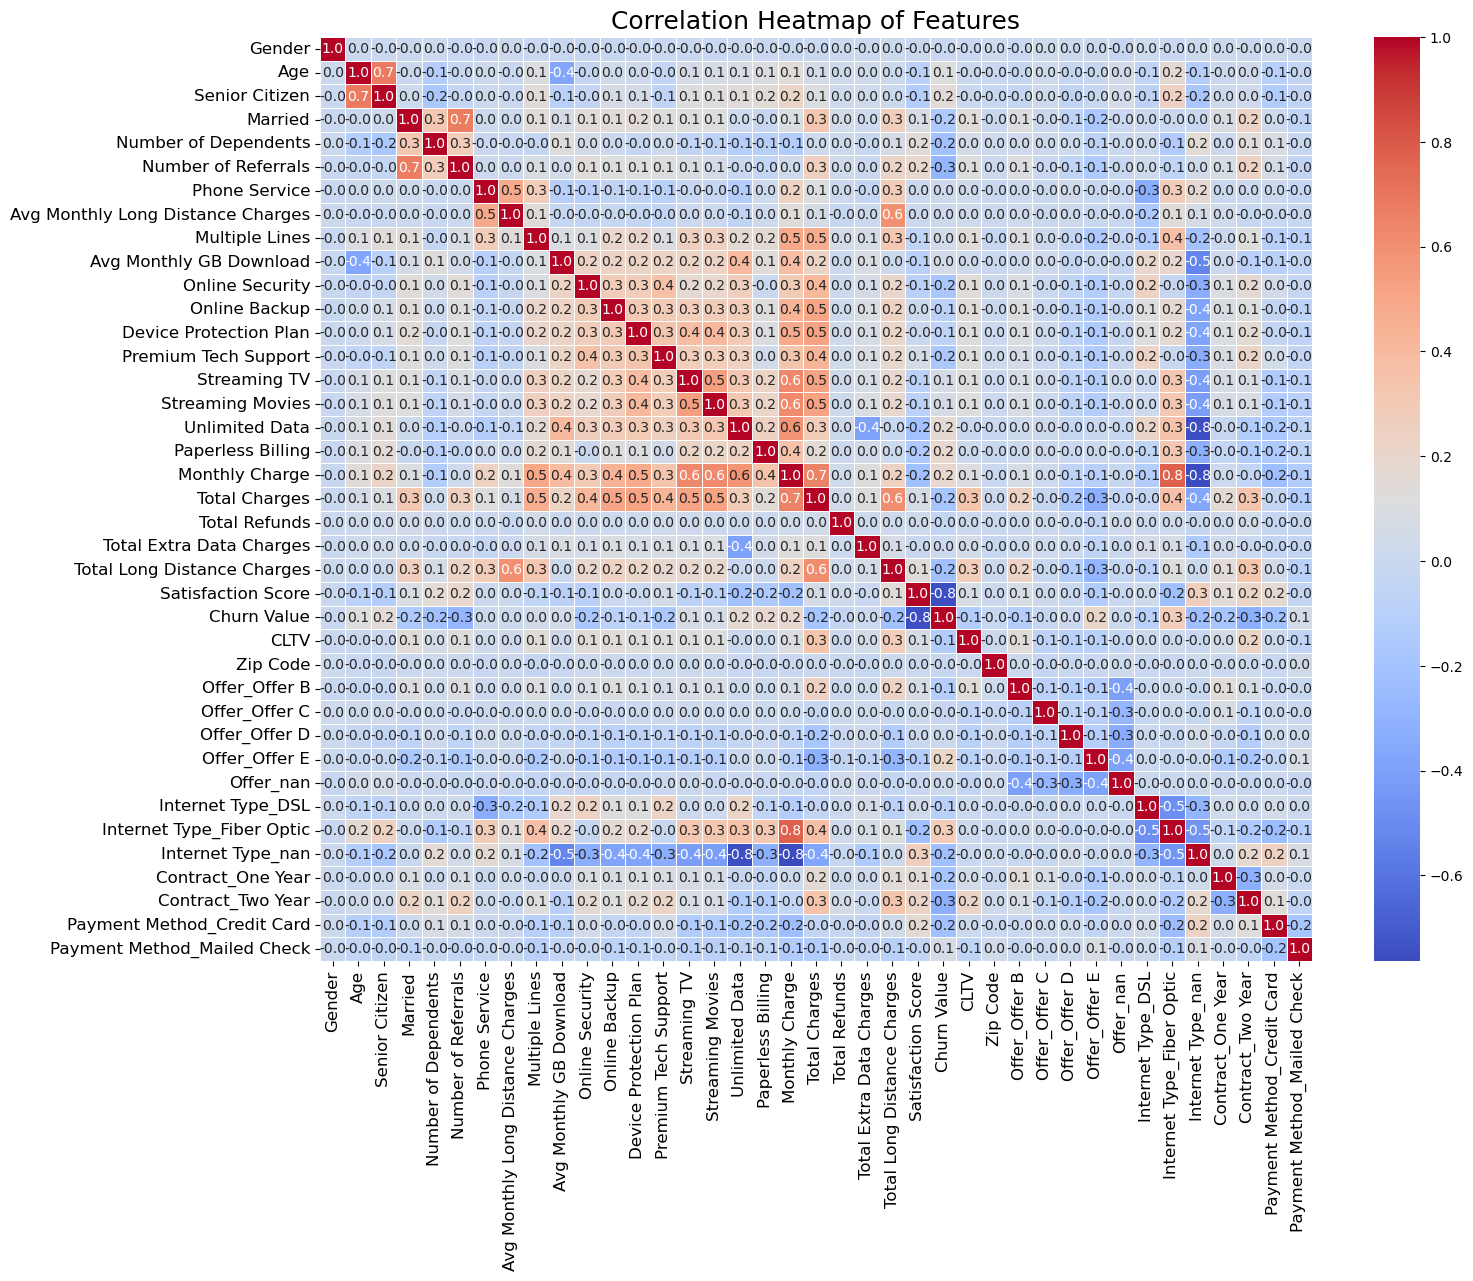

In [241]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

In [236]:
strong_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs.index.get_level_values(0) != strong_corr_pairs.index.get_level_values(1)]
strong_corr_pairs = strong_corr_pairs[(strong_corr_pairs.abs() > 0.8) & (strong_corr_pairs.abs() < 1.0)]

# Print the pairs
print("Pairs with correlation stronger than |0.8|:")
print(strong_corr_pairs)

Pairs with correlation stronger than |0.8|:
Total Charges     Total Revenue       0.972212
Total Revenue     Total Charges       0.972212
                  Tenure in Months    0.853146
Tenure in Months  Total Revenue       0.853146
Streaming Movies  Streaming Music     0.848528
Streaming Music   Streaming Movies    0.848528
Total Charges     Tenure in Months    0.826074
Tenure in Months  Total Charges       0.826074
dtype: float64


"Satisfaction Score" also has a high correlation with "Churn Value" (target variable) being -0.75. Maybe needs to be dropped? (Is this information available prior?)

In [242]:
columns2drop = ['Total Revenue', 'Tenure in Months', 'Streaming Music']

df = df.drop(columns=columns2drop)

KeyError: "['Total Revenue', 'Tenure in Months', 'Streaming Music'] not found in axis"

In [243]:
df.shape

(7043, 39)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Senior Citizen'),
  Text(0, 3.5, 'Married'),
  Text(0, 4.5, 'Number of Dependents'),
  Text(0, 5.5, 'Number of Referrals'),
  Text(0, 6.5, 'Phone Service'),
  Text(0, 7.5, 'Avg Monthly Long Distance Charges'),
  Text(0, 8.5, 'Multiple Lines'),
  Text(0, 9.5, 'Avg Monthly GB Download'),
  Text(0, 10.5, 'Online Security'),
  Text(0, 11.5, 'Online Backup'),
  Text(0, 12.5, 'Device Protection Plan'),
  Text(0, 13.5, 'Premium Tech Support'),
  Text(0, 14.5, 'Streaming TV'),
  Text(0, 15.5, 'Streaming Movies'),
  Text(0, 16.5, 'Unlimited Data'),
  Text(0, 17.5, 'Paperless Billing'),
  Text(0, 18.5, 'Monthly Charge'),
  Text(0, 19.5, 'Total Charges'),
  Text(0, 20.5

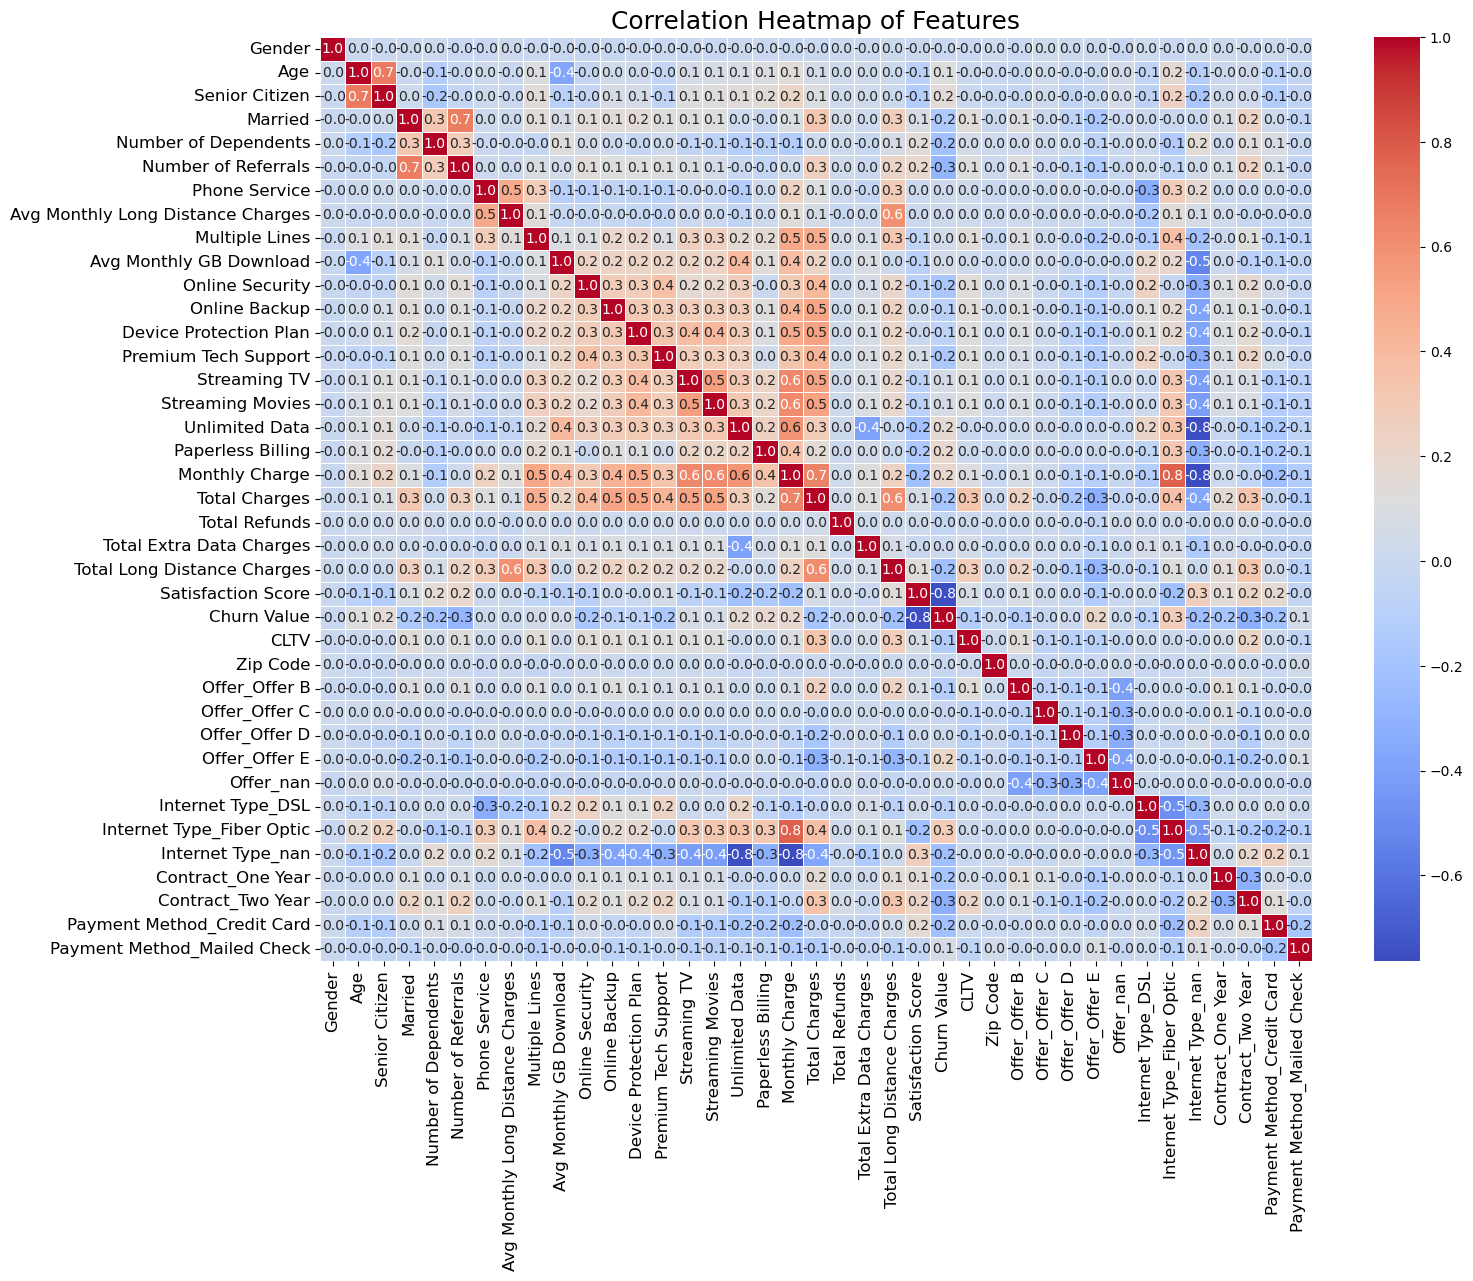

In [244]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#### Preprocessing is done here.

## Outlier detection:
For this we only investigate the numerical features.

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int32  
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int32  
 3   Married                            7043 non-null   int32  
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Phone Service                      7043 non-null   int32  
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   int32  
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   int32  
 11  Online Backup                      7043 non-null   int32

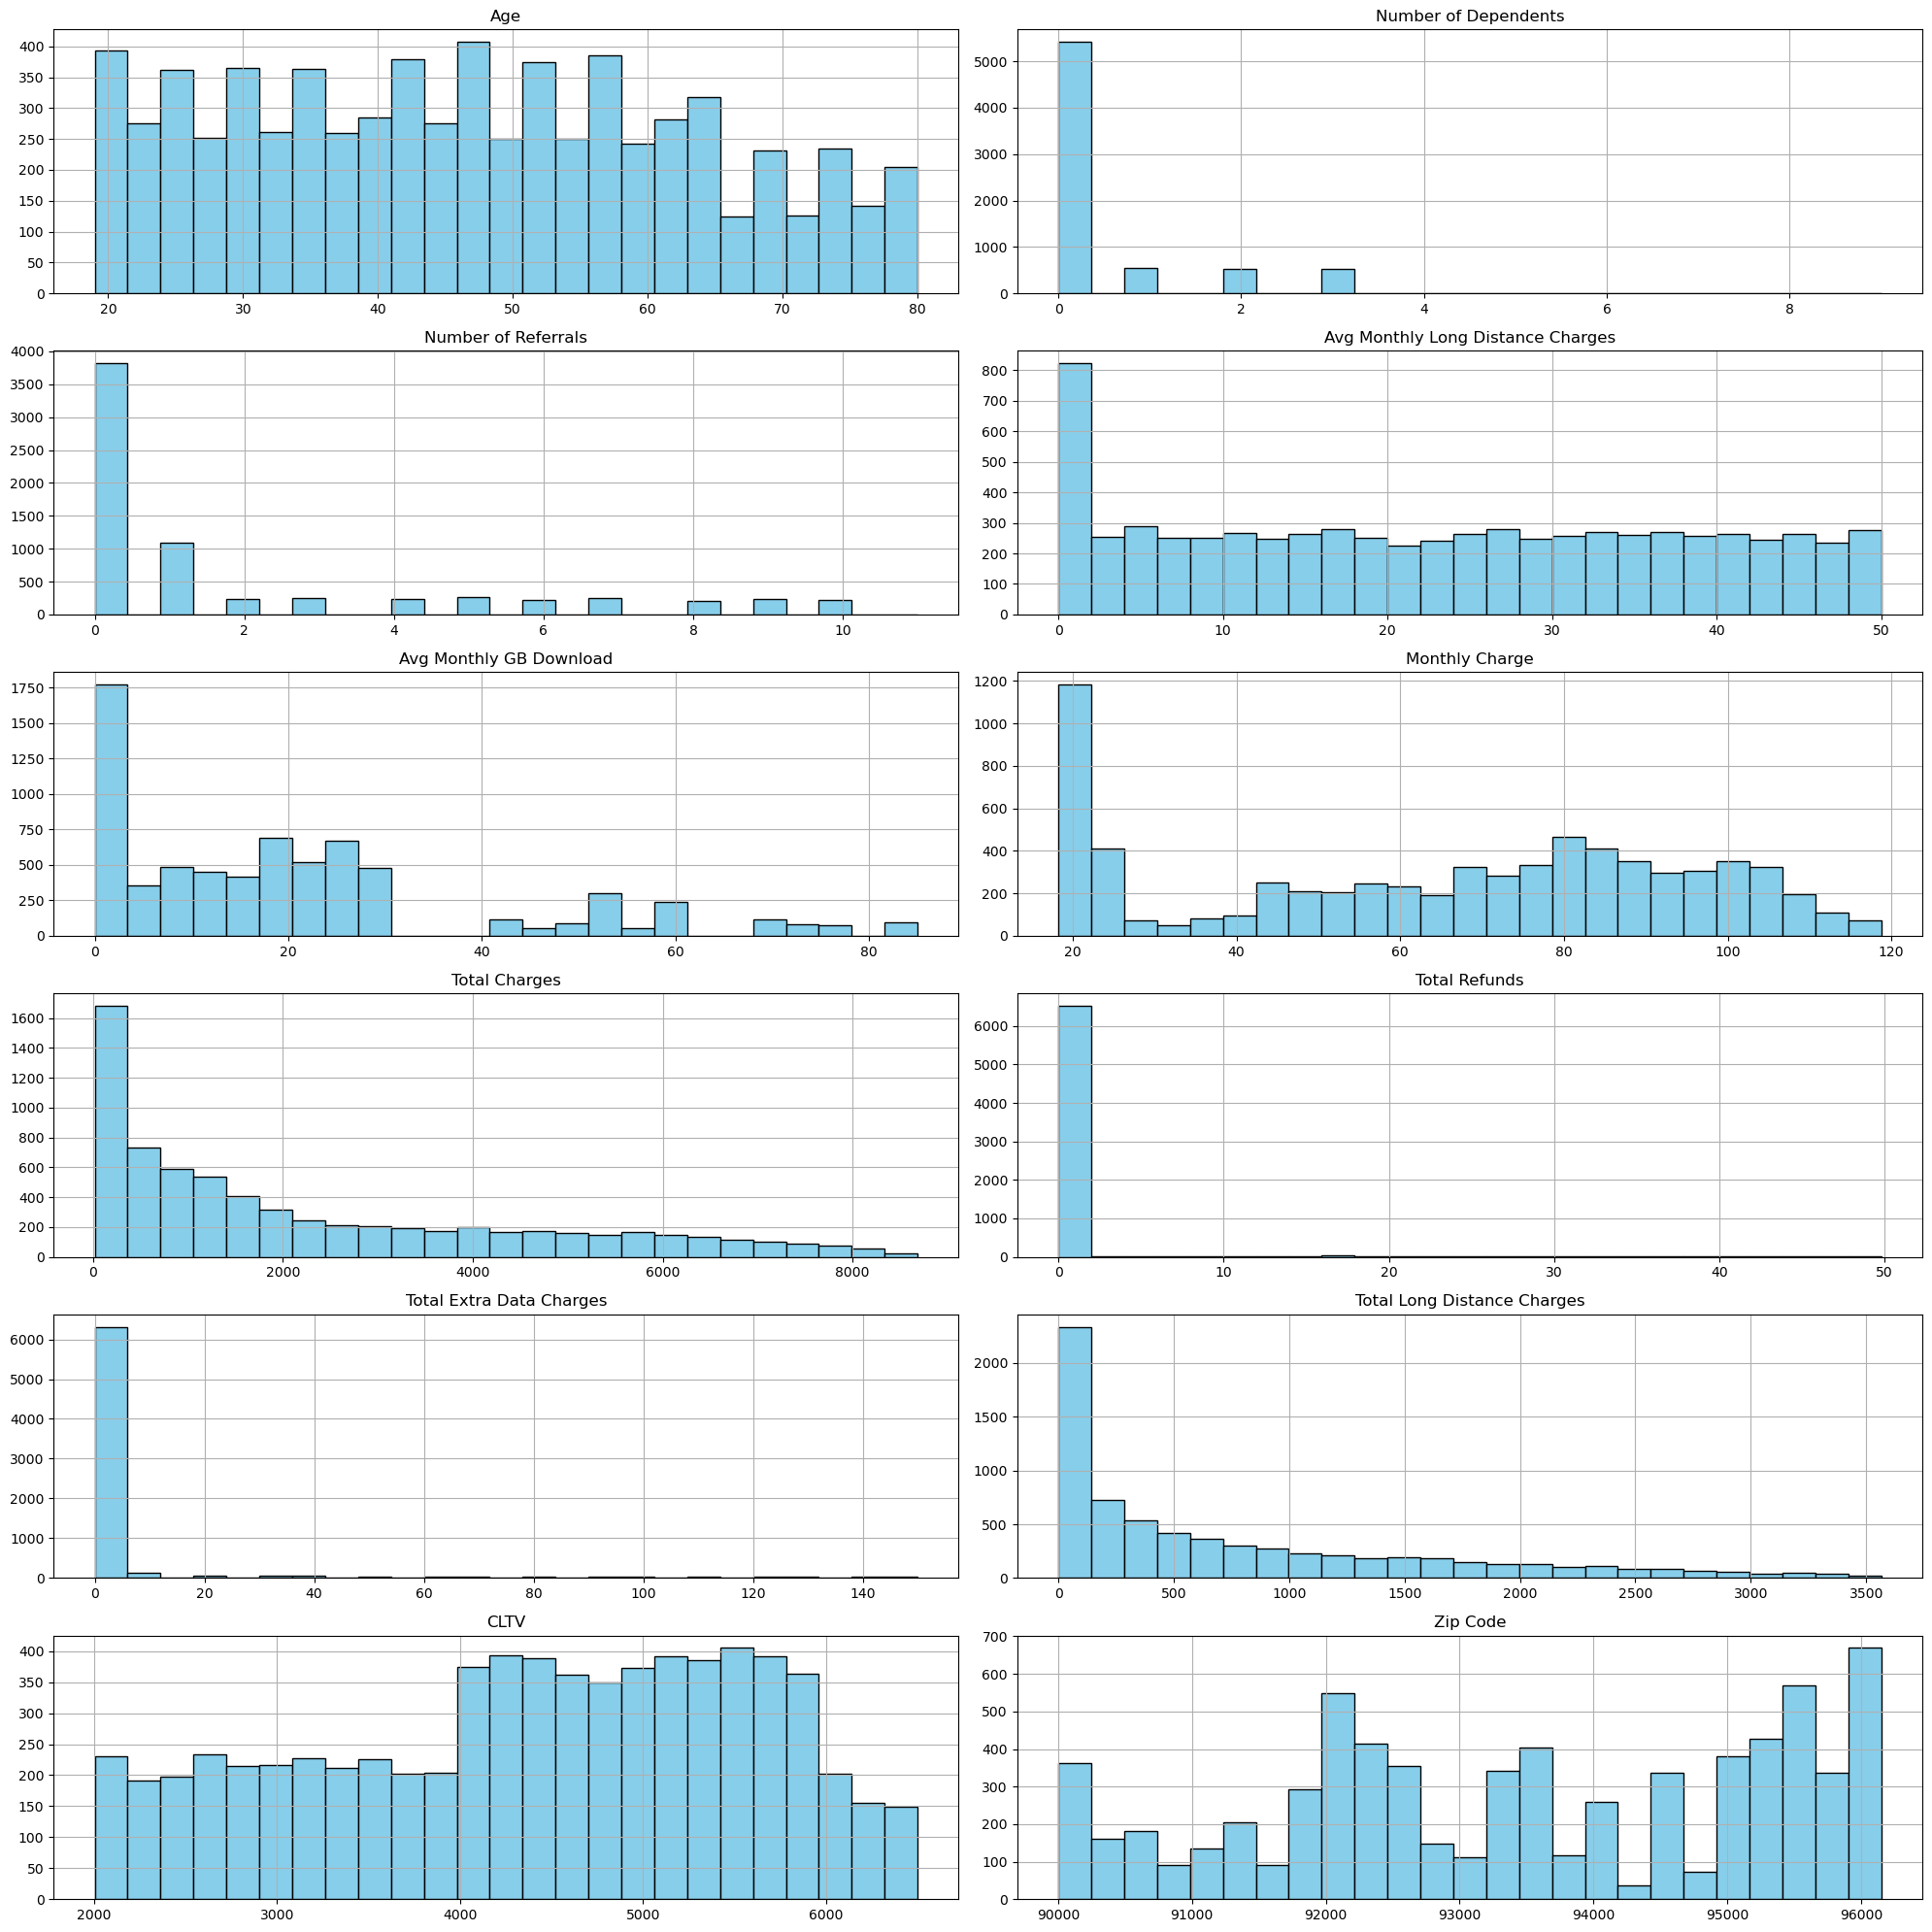

In [254]:
numcolumns = ['Age', 'Number of Dependents', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 
'CLTV', 'Zip Code']
df[numcolumns].hist(figsize=(20, 20), bins=25, layout=(6, 2), color='skyblue', edgecolor='black')
plt.tight_layout()


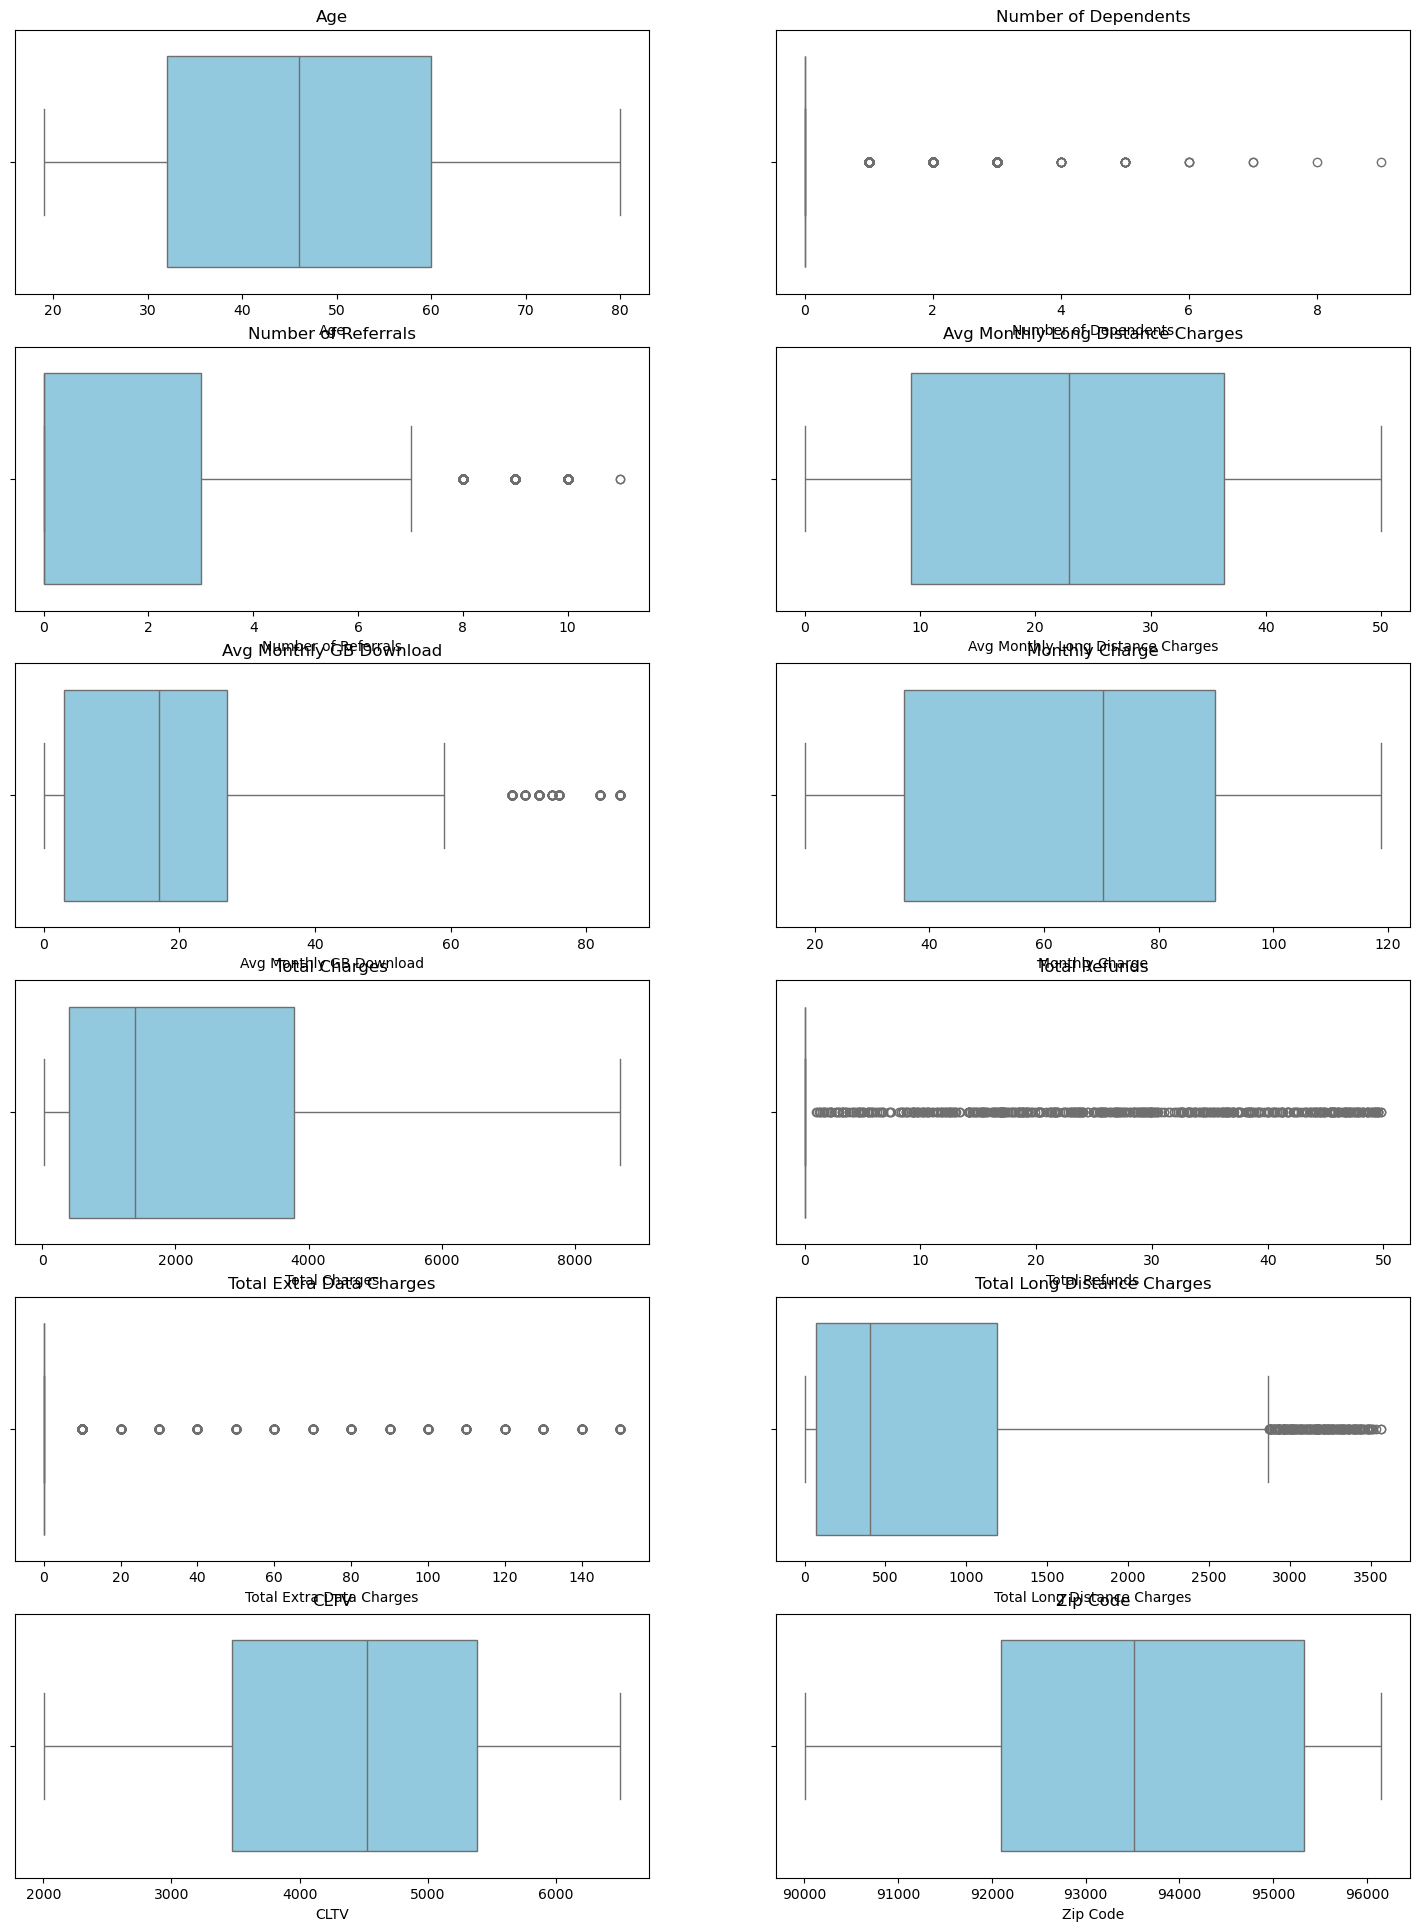

In [273]:
num_plots = len(numcolumns)

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, column in enumerate(numcolumns):
    sns.boxplot(data=df, x=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column)

# Remove any empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

Stuck atm with outlier detection/removal(what is best? 3 Sigma, boxplot etc...). Continue with building the model for now.